# The New School
## Fall 2015, Fall 2016 Cohort Analysis
#### Lauren Forti

<br>
<br>

[A. Setup](#setup) <a href='#setup'>

[B. Reading In and Cleaning the Data](#readin) <a href='#readin'>
    
[C. Analysis](#analysis) <a href='#analysis'>
- [1. Entering Cohorts Headcounts](#analysis) <a href='#analysis'>
- [2. Racial/Ethnic Distribution](#ethdist) <a href='#ethdist'>
- [3. Degree Completion Percentages](#grads) <a href='#grads'>
- [4. Major Distribution](#major) <a href='#major'>
    
[D. Exporting to PDF](#pdf) <a href='#pdf'>
<br>
<br>

<a id='setup'></a>

# A. Setup
First, the necessary libraries are imported to manipulate the data, create visualizations, and save the tables and charts to a PDF.

In [1]:
# libraries for data
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# libraries to make pdf
from borb.pdf import Document
from borb.pdf import Page
from borb.pdf import PDF
from borb.pdf import Paragraph
from borb.pdf import PageLayout
from borb.pdf.page.page_size import PageSize
from borb.pdf import SingleColumnLayout
from borb.pdf import MultiColumnLayout
from borb.io.read.types import Decimal
from borb.pdf import HexColor
from borb.pdf import Chart
from borb.pdf import Alignment
from borb.pdf import FlexibleColumnWidthTable
from borb.pdf import Table, TableCell

<a id='readin'></a>

# B. Reading In and Cleaning the Data
The data is read into a DataFrame as a CSV from Google Sheets and prepared for analysis. A DataFrame is a data structure with rows and columns, similar to an Excel spreadsheet.

In [2]:
# get sheets info
sheet_id = '1cntB-70UiBtXCdwg9EN8__5V8Dg-gy96Xc-lpLah6Wc'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'

In [3]:
# read sheet into df
df = pd.read_csv(url)

# look at first 10 rows
df.head(10)

,TERM,UNIQUE ID,DIVISION_CODE,COLLEGE_ROLLUP,STUDENT_TYPE_CODE,STUDENT_TYPE,STUDENT_LEVEL,DEGREE_CODE,DEGREE,MAJOR,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Fall 2015,2172,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Communication Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fall 2015,4082,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fall 2015,2989,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fall 2015,4427,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fall 2015,2543,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fall 2015,2329,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Photography,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fall 2015,4902,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fall 2015,3058,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BBA,Bachelor of Business Admin,Strategic Design & Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fall 2015,3008,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Undeclared,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fall 2015,2372,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Photography,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get # of rows and columns
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns.')

The data has 2474 rows and 26 columns.


Looking at the DataFrame, the data imported with extra columns.

In [5]:
# get list of extra columns
df.columns

Index(['TERM', 'UNIQUE ID', 'DIVISION_CODE', 'COLLEGE_ROLLUP',
       'STUDENT_TYPE_CODE', 'STUDENT_TYPE', 'STUDENT_LEVEL', 'DEGREE_CODE',
       'DEGREE', 'MAJOR', 'IPEDS_RACE_ETHNICITY', 'GENDER', 'TERM_CREDITS',
       'INSTITUTIONAL_AID', 'GRADUATION_DATE', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

The extra empty columns are removed.

In [6]:
# remove extra cols
df = df.loc[:, 'TERM':'GRADUATION_DATE']
# verify removal
df.head(5)

,TERM,UNIQUE ID,DIVISION_CODE,COLLEGE_ROLLUP,STUDENT_TYPE_CODE,STUDENT_TYPE,STUDENT_LEVEL,DEGREE_CODE,DEGREE,MAJOR,IPEDS_RACE_ETHNICITY,GENDER,TERM_CREDITS,INSTITUTIONAL_AID,GRADUATION_DATE
0,Fall 2015,2172,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Communication Design,International,Female,15.0,Y,31-May-2019
1,Fall 2015,4082,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Asian,Female,15.0,Y,31-May-2019
2,Fall 2015,2989,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,International,Female,15.0,Y,31-May-2019
3,Fall 2015,4427,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Asian,Female,15.0,Y,NaN
4,Fall 2015,2543,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,International,Female,15.0,Y,31-May-2020


The graduation date column is converted to a datetime format for ease of use.

In [7]:
# look at datatypes
df.dtypes

TERM                     object
UNIQUE ID                 int64
DIVISION_CODE            object
COLLEGE_ROLLUP           object
STUDENT_TYPE_CODE        object
STUDENT_TYPE             object
STUDENT_LEVEL            object
DEGREE_CODE              object
DEGREE                   object
MAJOR                    object
IPEDS_RACE_ETHNICITY     object
GENDER                   object
TERM_CREDITS            float64
INSTITUTIONAL_AID        object
GRADUATION_DATE          object
dtype: object

In [8]:
# convert grad date to datetime type
df['GRADUATION_DATE'] = pd.to_datetime(df['GRADUATION_DATE'], 
                                       format = '%d-%b-%Y',
                                       errors = 'coerce')
# check conversion
df.head(5)

,TERM,UNIQUE ID,DIVISION_CODE,COLLEGE_ROLLUP,STUDENT_TYPE_CODE,STUDENT_TYPE,STUDENT_LEVEL,DEGREE_CODE,DEGREE,MAJOR,IPEDS_RACE_ETHNICITY,GENDER,TERM_CREDITS,INSTITUTIONAL_AID,GRADUATION_DATE
0,Fall 2015,2172,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Communication Design,International,Female,15.0,Y,2019-05-31
1,Fall 2015,4082,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Asian,Female,15.0,Y,2019-05-31
2,Fall 2015,2989,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,International,Female,15.0,Y,2019-05-31
3,Fall 2015,4427,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Asian,Female,15.0,Y,NaT
4,Fall 2015,2543,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,International,Female,15.0,Y,2020-05-31


The data set is checked for any missing values. The values missing from institutional aid can be interpreted as no institutional aid received, and for graduation date, that the student has not yet graduated.

In [9]:
# check missing values
df.isnull().sum(axis = 0)

TERM                      0
UNIQUE ID                 0
DIVISION_CODE             0
COLLEGE_ROLLUP            0
STUDENT_TYPE_CODE         0
STUDENT_TYPE              0
STUDENT_LEVEL             0
DEGREE_CODE               0
DEGREE                    0
MAJOR                     0
IPEDS_RACE_ETHNICITY      0
GENDER                    0
TERM_CREDITS              0
INSTITUTIONAL_AID       391
GRADUATION_DATE         988
dtype: int64

An column is created to help count the students.

In [10]:
# add col to count students in groupings later
df['STUDENT'] = 1

The race/ethnicities are renamed and the changes are verified.

In [11]:
# get race/ethnicity distribution
df['IPEDS_RACE_ETHNICITY'].value_counts()

International                                1080
White                                         615
Asian                                         267
Hispanic or Latino                            242
Black or African American                     110
Unreported by Student                          81
Two or More Races                              73
Native Hawaiian or Other Pacific Islander       5
American Indian or Alaska Native                1
Name: IPEDS_RACE_ETHNICITY, dtype: int64

In [12]:
# rename race/ethnicities
df.loc[df['IPEDS_RACE_ETHNICITY'].str.contains('International'), 'IPEDS_RACE_ETHNICITY'] = 'Nonresident'
df.loc[df['IPEDS_RACE_ETHNICITY'].str.contains('Hispanic or Latino'), 'IPEDS_RACE_ETHNICITY'] = 'Hispanic/Latino'
df.loc[df['IPEDS_RACE_ETHNICITY'].str.contains('Native Hawaiian or Other Pacific Islander'), 'IPEDS_RACE_ETHNICITY'] = 'Native Hawaiian or other Pacific Islander'
df.loc[df['IPEDS_RACE_ETHNICITY'].str.contains('Unreported by Student'), 'IPEDS_RACE_ETHNICITY'] = 'Race and/or Ethnicity Unknown'

In [13]:
# check renaming
df['IPEDS_RACE_ETHNICITY'].value_counts()

Nonresident                                  1080
White                                         615
Asian                                         267
Hispanic/Latino                               242
Black or African American                     110
Race and/or Ethnicity Unknown                  81
Two or More Races                              73
Native Hawaiian or other Pacific Islander       5
American Indian or Alaska Native                1
Name: IPEDS_RACE_ETHNICITY, dtype: int64

<a id='analysis'></a>

# C. Analysis
## 1. Entering Cohorts Headcounts

The count of the number of students in the entering Fall 2015 and Fall 2016 cohorts by student type are found.

First, the data is split into DataFrames of each cohort.

In [14]:
# get fall 2015 entering students
df2015 = df[df['TERM'] == 'Fall 2015']

# get fall 2016 entering students
df2016 = df[df['TERM'] == 'Fall 2016']

A table is built showing the count of students in each student type by cohort.

In [15]:
# get student counts by term and student type
df_term = df[['STUDENT', 'TERM', 'STUDENT_TYPE']].groupby(['TERM', 'STUDENT_TYPE']).count()

# show table
display(df_term)

STUDENT
TERM      STUDENT_TYPE               
Fall 2015 Entering, Freshman      740
          Entering, Transfer      432
Fall 2016 Entering, Freshman      956
          Entering, Transfer      346

Then, the table is flattened for readability and saved as a CSV file.

In [16]:
# flatten table
df_term2 = df_term.unstack('TERM')
df_term2.index.name = None
df_term2.columns = df_term2.columns.set_levels(['Number of Students'], level = 0)
df_term2.columns = df_term2.columns.rename(None, level = 1)

# show table
display(df_term2['Number of Students'])

# save to csv
df_term2.to_csv('F2015F2016_headcounts_by_student_type.csv')

,Fall 2015,Fall 2016
"Entering, Freshman",740,956
"Entering, Transfer",432,346


The flattened table is drawn as an image in order to be added to the PDF.

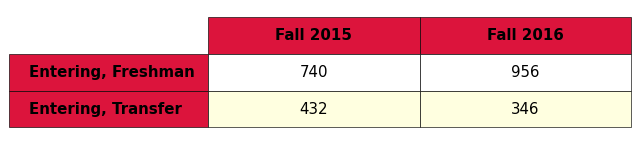

In [17]:
## HEADCOUNT CHART

# setup for headcount table
fig_headct, ax_headct = plt.subplots(1, 1,  constrained_layout = True, figsize = (7,1.5), dpi = 90)
ax_headct.set_axis_off()

# create headcount table
hct = ax_headct.table(cellText = df_term2.values,
                      colLabels = df_term2.columns.levels[1],
                      rowLabels = df_term2.index,
                      
                      # set colors
                      rowColours = ['crimson'] * df_term2.index.shape[0],
                      colColours = ['crimson'] * df_term2.columns.shape[0],
                      cellColours = [['white', 'white'], ['lightyellow', 'lightyellow']],
                      
                      # cell alignment
                      cellLoc = 'center',
                      loc = 'center')

# change row height
hct.scale(1, 2)

# change font
hct.auto_set_font_size(False)
hct.set_fontsize(12)

for (row, col), cell in hct.get_celld().items():
    # set border weight
    cell.set_linewidth(.50)
    
    # make headers bold
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties = FontProperties(weight = 'bold', size = 12))

# display chart
plt.show()
plt.close()

<a id='ethdist'></a>

## 2. Racial/Ethnic Distribution
The racial/ethnic distribution of students in the Fall 2015 and Fall 2016 entering cohorts is visualized with tables and bar charts. The final table is saved to a CSV file and the bar charts are added to the PDF.

First, a table is built with the distribution of race/ethnicity of the students in the Fall 2015 and Fall 2016 entering cohorts.

In [18]:
# get student race/ethnicity dist by cohort
df_eth = df[['STUDENT', 'TERM', 'IPEDS_RACE_ETHNICITY']].groupby(['TERM', 'IPEDS_RACE_ETHNICITY']).sum()
# show df
display(df_eth)

STUDENT
TERM      IPEDS_RACE_ETHNICITY                              
Fall 2015 Asian                                          123
          Black or African American                       57
          Hispanic/Latino                                101
          Native Hawaiian or other Pacific Islander        3
          Nonresident                                    512
          Race and/or Ethnicity Unknown                   33
          Two or More Races                               33
          White                                          310
Fall 2016 American Indian or Alaska Native                 1
          Asian                                          144
          Black or African American                       53
          Hispanic/Latino                                141
          Native Hawaiian or other Pacific Islander        2
          Nonresident                                    568
          Race and/or Ethnicity Unknown                   48
          Two or More Races                               40
          White                                          305

The table is flattened for readability and saved as a CSV file.

In [19]:
# flatten table
df_eth2 = df_eth.unstack('TERM')
df_eth2.columns = df_term2.columns.rename(None, level = 0)

# fill missing values
df_eth2 = df_eth2['Number of Students'].fillna(0).astype(int)

# show table
display(df_eth2)

# save to csv
df_eth2.to_csv('F2015F2016student_race_ethn_distribution.csv')

,Fall 2015,Fall 2016
IPEDS_RACE_ETHNICITY,,
American Indian or Alaska Native,0,1
Asian,123,144
Black or African American,57,53
Hispanic/Latino,101,141
Native Hawaiian or other Pacific Islander,3,2
Nonresident,512,568
Race and/or Ethnicity Unknown,33,48
Two or More Races,33,40
White,310,305


Then, the flattened table is drawn as an image in order to be added to the PDF.

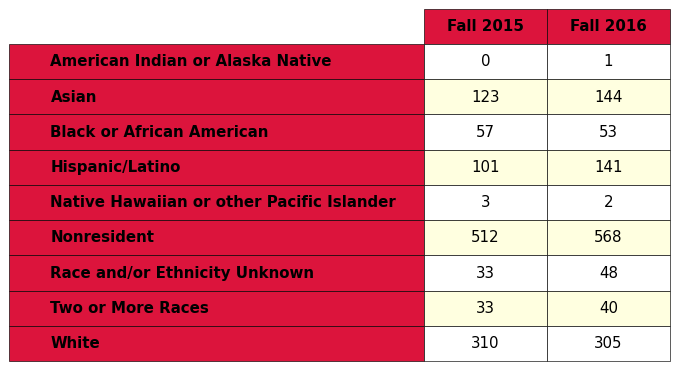

In [20]:
## STUDENT RACE/ETHNICITY DISTRIBUTION TABLE

# setup
fig_eth, ax_eth = plt.subplots(1, 1,  constrained_layout = True, figsize = (7,4), dpi = 90)
ax_eth.set_axis_off()

# create table
t_eth = ax_eth.table(cellText = df_eth2.values,
                     colLabels = df_eth2.columns,
                     rowLabels = df_eth2.index,
                      
                     # set colors
                     rowColours = ['crimson']*df_eth2.index.shape[0],
                     colColours = ['crimson']*df_eth2.columns.shape[0],
                     cellColours = [['white', 'white'],['lightyellow', 'lightyellow'],['white', 'white'],['lightyellow', 'lightyellow'],['white', 'white'],['lightyellow', 'lightyellow'],['white', 'white'],['lightyellow', 'lightyellow'],['white', 'white']],
                        
                     # set column width
                     colWidths = [0.65 for x in df_eth2.columns],
                      
                     # cell alignment
                     cellLoc = 'center',
                     loc = 'center')

# change row height
t_eth.scale(1, 2)

# change font
t_eth.auto_set_font_size(False)
t_eth.set_fontsize(12)


for (row, col), cell in t_eth.get_celld().items():
    # set border weight
    cell.set_linewidth(.50)
    
    # make headers bold
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties = FontProperties(weight = 'bold', size = 12))

# display chart
plt.show()
plt.close()

Next, the distribution is plotted as bar charts for each cohort.

In [21]:
# get 2015 race/eth table
df2015_eth_t = df2015[['STUDENT', 'IPEDS_RACE_ETHNICITY']].groupby(['IPEDS_RACE_ETHNICITY']).sum()
df2015_eth_t = df2015_eth_t.unstack('IPEDS_RACE_ETHNICITY')

# get 2016 race/eth table
df2016_eth_t = df2016[['STUDENT', 'IPEDS_RACE_ETHNICITY']].groupby(['IPEDS_RACE_ETHNICITY']).sum()
df2016_eth_t = df2016_eth_t.unstack('IPEDS_RACE_ETHNICITY')

In [22]:
df2015_eth_t

         IPEDS_RACE_ETHNICITY                     
STUDENT  Asian                                        123
         Black or African American                     57
         Hispanic/Latino                              101
         Native Hawaiian or other Pacific Islander      3
         Nonresident                                  512
         Race and/or Ethnicity Unknown                 33
         Two or More Races                             33
         White                                        310
dtype: int64

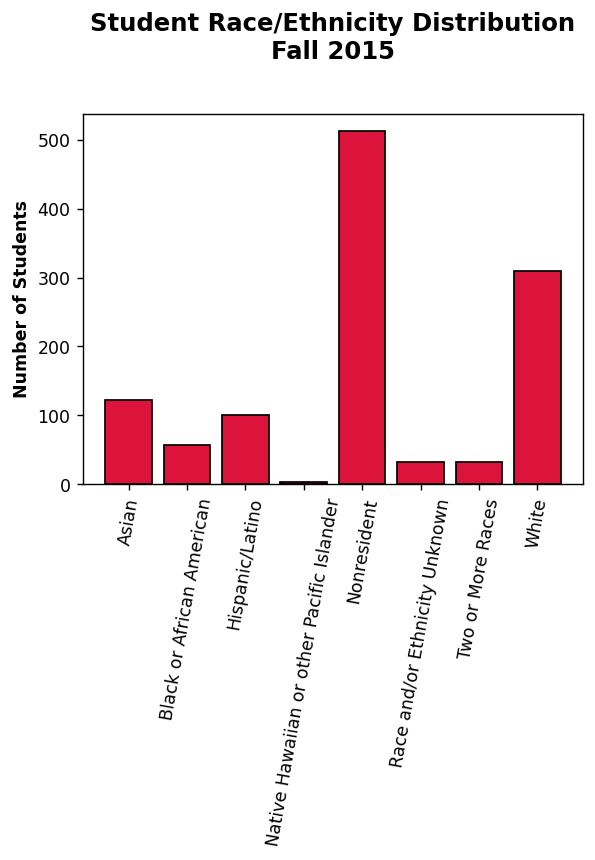

In [23]:
## STUDENT RACE/ETHNICITY DISTRIBUTION FALL 2015 CHART

# setup
fig_eth_2015, ax_eth_2015 = plt.subplots(1, 1,  constrained_layout = True, figsize = (4.65,6.73), dpi = 125)

# create chart
bar_eth_2015 = ax_eth_2015.bar(df2015_eth_t['STUDENT'].index.tolist(), 
        df2015_eth_t.values,
        color = 'crimson',
        edgecolor = 'k'
        )
# add axis titles
# rotate labels for readability
plt.xticks(rotation = 80)
plt.ylabel('Number of Students', fontweight = 'bold')

# add chart title
plt.title('Student Race/Ethnicity Distribution\nFall 2015',
          fontweight = 'bold',
          size = 14,
          y = 1.12)

# display chart
plt.show()
plt.close()

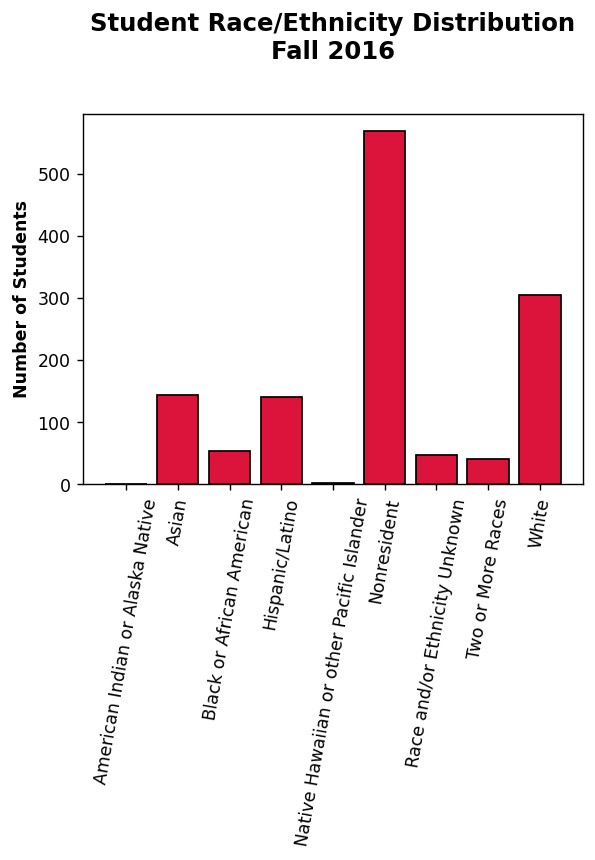

In [24]:
## STUDENT RACE/ETHNICITY DISTRIBUTION FALL 2016 CHART

# setup
fig_eth_2016, ax_eth_2016 = plt.subplots(1, 1,  constrained_layout = True, figsize = (4.65,6.73), dpi = 125)

# create chart
bar_eth_2016 = ax_eth_2016.bar(df2016_eth_t['STUDENT'].index.tolist(), 
                               df2016_eth_t.values,
                               color = 'crimson',
                               edgecolor = 'k'
                               )
# add axis titles
# rotate labels for readability
plt.xticks(rotation = 80)
plt.ylabel('Number of Students', fontweight = 'bold')

# add chart title
plt.title('Student Race/Ethnicity Distribution\nFall 2016',
          fontweight = 'bold',
          size = 14,
          y = 1.12)

# display chart
plt.show()
plt.close()

<a id='grads'></a>

## 3. Degree Completion Percentages
The overall percentage of full-time students in each cohort who completed bachelor's degrees and the percentage of full-time students completing bachelors degree within four years are calculated, saved to CSV files, and then visualized with pie charts.

First, the different kinds of degrees are extracted.

In [25]:
# get degree codes
df['DEGREE_CODE'].value_counts()

BFA    1572
AAS     594
BBA     303
BS        5
Name: DEGREE_CODE, dtype: int64

DataFrames of full-time students in bachelor's programs are made for each cohort.

In [26]:
# get full-time students in bachelor's programs
df2015_bgrads_ft = df2015[(df2015['DEGREE_CODE'] != 'AAS') & (df2015['TERM_CREDITS'] >= 12)]
df2016_bgrads_ft = df2016[(df2016['DEGREE_CODE'] != 'AAS') & (df2016['TERM_CREDITS'] >= 12)]

Then, those DataFrames are filtered to students who have completed their degrees. A headcount is calculated for each cohort.

In [27]:
# get # of grads
df2015_grads = df2015_bgrads_ft.dropna(subset = ['GRADUATION_DATE']).shape[0]
df2016_grads = df2016_bgrads_ft.dropna(subset = ['GRADUATION_DATE']).shape[0]

# output results
print(f'Full-time, First-year Students in Bachelors Programs\nThat Have Completed Their Degrees')
print('-' * 60)
print(f'Entering Fall 2015: {df2015_grads}')
print(f'Entering Fall 2016: {df2016_grads}')

Full-time, First-year Students in Bachelors Programs
That Have Completed Their Degrees
------------------------------------------------------------
Entering Fall 2015: 643
Entering Fall 2016: 795


Percentages are calculated.

In [28]:
# calc %
df2015_p = df2015_grads/(df2015_bgrads_ft.shape[0])*100
df2016_p = df2016_grads/(df2016_bgrads_ft.shape[0])*100

# output results
print(f'Percentage of Full-time, First-year Students Completing their Degree\nTo Students That Have Not Yet Completed')
print('-' * 80)
print(f'Entering Fall 2015: {df2015_p:.02f}%')
print(f'Entering Fall 2016: {df2016_p:.02f}%')

Percentage of Full-time, First-year Students Completing their Degree
To Students That Have Not Yet Completed
--------------------------------------------------------------------------------
Entering Fall 2015: 77.56%
Entering Fall 2016: 79.34%


The percentages are saved into a CSV file.

In [29]:
# create list of percentages
grad_data = [[df2015_p, 100 - df2015_p], [df2016_p, 100 - df2016_p]]

# make dataframe of percentages
df_grads = pd.DataFrame(grad_data,
                        columns = ['Completed', 'Not Yet Completed'],
                        index = ['Fall 2015', 'Fall 2016']).round(2)

# show table
display(df_grads)

# save to csv
df_grads.to_csv('F2015F2016_grads_percentages.csv')

,Completed,Not Yet Completed
Fall 2015,77.56,22.44
Fall 2016,79.34,20.66


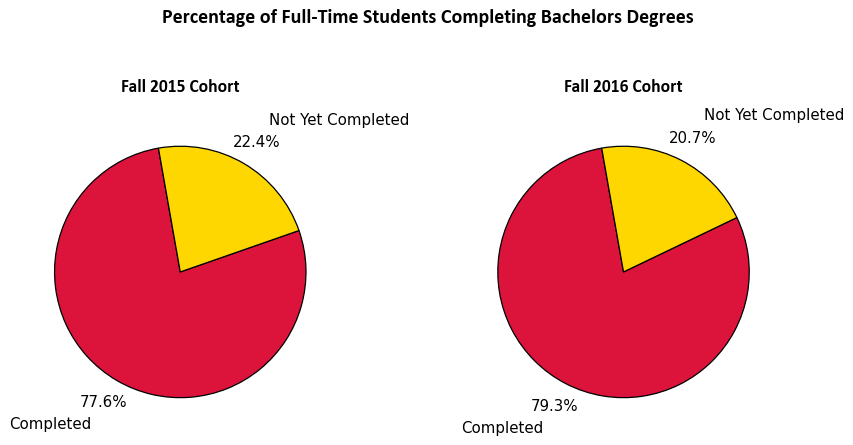

In [30]:
## OVERALL PERCENTAGE OF STUDENTS IN EACH COHORT WHO COMPLETED THEIR DEGREE 

# pie chart labels
labels = 'Completed','Not Yet Completed'

# Fall 2015
sizes1 = [df2015_p, 100 - df2015_p]
# Fall 2016
sizes2 = [df2016_p, 100 - df2016_p]

grads_fig, grads_ax = plt.subplots(1, 2, figsize = (10,5), dpi = 90)

# plot Fall 2015
grads_ax[0].pie(sizes1,
                labels = labels,
                autopct = '%1.1f%%',
                startangle = 100,
                colors = ['crimson', 'gold'],
                wedgeprops = {'edgecolor':'black'},
                textprops = {'fontsize': 12},
                pctdistance = 1.2,
                labeldistance = 1.4
                )
# set title
grads_ax[0].set_title('Fall 2015 Cohort',
                      fontweight = 'bold',
                      fontname = 'calibri',
                      fontsize = 14,
                      y = 1.05)
# plot Fall 2016
grads_ax[1].pie(sizes2,
                labels = labels,
                startangle = 100,
                autopct = '%1.1f%%',
                colors = ['crimson', 'gold'],
                wedgeprops = {'edgecolor':'black'},
                textprops = {'fontsize': 12},
                pctdistance = 1.2,
                labeldistance = 1.4
                )
# set title
grads_ax[1].set_title('Fall 2016 Cohort',
                      fontweight = 'bold',
                      fontname = 'calibri',
                      fontsize = 14,
                      y = 1.05)

# add figure title
grads_fig.suptitle('Percentage of Full-Time Students Completing Bachelors Degrees',
                    fontweight = 'bold',
                    fontname = 'calibri',
                    fontsize = 16,
                    y = 1.05)

# add padding between pie charts
plt.subplots_adjust(wspace = 1)
plt.tight_layout()

# show chart
plt.show()
plt.close()

DataFrames of full-time students seeking bachelor's degrees completing their degree within four years are made for each cohort.

In [31]:
# students completing their degree w/in 4 years
df2015_4 = df2015_bgrads_ft[df2015_bgrads_ft['GRADUATION_DATE'] < '31-Aug-2019']
df2016_4 = df2016_bgrads_ft[df2016_bgrads_ft['GRADUATION_DATE'] < '31-Aug-2020']

# preview Fall 2015 cohort
df2015_4.head(5)

,TERM,UNIQUE ID,DIVISION_CODE,COLLEGE_ROLLUP,STUDENT_TYPE_CODE,STUDENT_TYPE,STUDENT_LEVEL,DEGREE_CODE,DEGREE,MAJOR,IPEDS_RACE_ETHNICITY,GENDER,TERM_CREDITS,INSTITUTIONAL_AID,GRADUATION_DATE,STUDENT
0,Fall 2015,2172,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Communication Design,Nonresident,Female,15.0,Y,2019-05-31,1
1,Fall 2015,4082,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Asian,Female,15.0,Y,2019-05-31,1
2,Fall 2015,2989,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,Nonresident,Female,15.0,Y,2019-05-31,1
6,Fall 2015,4902,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BFA,Bachelor of Fine Arts,Fashion Design,White,Female,15.0,Y,2019-05-31,1
7,Fall 2015,3058,PS,Parsons School of Design,F,"Entering, Freshman",Undergraduate,BBA,Bachelor of Business Admin,Strategic Design & Management,White,Female,15.0,Y,2019-05-31,1


Then, those DataFrames are filtered to students seeking bachelor's degrees who have graduated within four years. A headcount is calculated for each cohort.

In [32]:
# get # students completing their degree w/in 4 years
df2015_4_ct = df2015_4.shape[0]
df2016_4_ct = df2016_4.shape[0]

# output results
print(f'Full-time, First-year Bachelors Degree Seeking Students\nThat Have Completed Their Degree Within Four Years')
print('-' * 60)
print(f'Entering Fall 2015: {df2015_4_ct}')
print(f'Entering Fall 2016: {df2016_4_ct}')

Full-time, First-year Bachelors Degree Seeking Students
That Have Completed Their Degree Within Four Years
------------------------------------------------------------
Entering Fall 2015: 514
Entering Fall 2016: 668


The number of students is used to calculate the percentage of full time, first year students seeking bachelor's degrees who have graduated within four years for each cohort.

In [33]:
# calc % students completing their degree w/in 4 years
df2015_4_p = df2015_4_ct/(df2015_bgrads_ft.shape[0])*100
df2016_4_p = df2016_4_ct/(df2016_bgrads_ft.shape[0])*100

# output results
print(f'Percentage of Full-time, First-year Bachelors Degree Seeking Students\nThat Have Completed Their Degree Within Four Years To Students That Have Not Yet Completed')
print('-' * 80)
print(f'Entering Fall 2015: {df2015_4_p:.02f}%')
print(f'Entering Fall 2016: {df2016_4_p:.02f}%')

Percentage of Full-time, First-year Bachelors Degree Seeking Students
That Have Completed Their Degree Within Four Years To Students That Have Not Yet Completed
--------------------------------------------------------------------------------
Entering Fall 2015: 62.00%
Entering Fall 2016: 66.67%


The percentages are saved to a CSV file.

In [34]:
# create list of percentages
grad_4_data = [[df2015_4_p, 100 - df2015_4_p], [df2016_4_p, 100 - df2016_4_p]]

# create dataframe of percentages
df_4_grads = pd.DataFrame(grad_4_data,
                         columns = ['Completed', 'Not Yet Completed'],
                         index = ['Fall 2015', 'Fall 2016']).round(2)

# show table
display(df_4_grads)

# save to csv
df_grads.to_csv('F2015F2016_grads_4years_percentages.csv')

,Completed,Not Yet Completed
Fall 2015,62.00,38.00
Fall 2016,66.67,33.33


Pie charts are made for each cohort to visualize the percentages of full time students seeking bachelor's degrees who have completed degrees within four years.

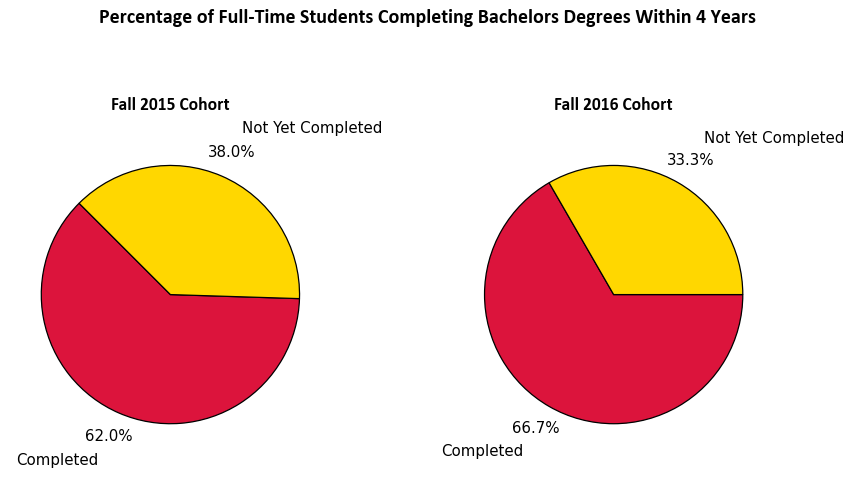

In [35]:
## OVERALL PERCENTAGE OF STUDENTS IN EACH COHORT WHO COMPLETED THEIR DEGREE W/in 4 YEARS

# Fall 2015
sizesa = [df2015_4_p, 100 - df2015_4_p]
# Fall 2016
sizesb = [df2016_4_p, 100 - df2016_4_p]

grads_baft_fig, grads_baft_ax = plt.subplots(1, 2, figsize = (10,5), dpi = 90)

# plot Fall 2015
grads_baft_ax[0].pie(sizesa,
                     labels = labels,
                     autopct = '%1.1f%%',
                     startangle = 135,
                     colors = ['crimson', 'gold'],
                     wedgeprops = {'edgecolor':'black'},
                     textprops = {'fontsize': 12},
                     pctdistance = 1.2,
                     labeldistance = 1.4
                    )
# set title
grads_baft_ax[0].set_title('Fall 2015 Cohort',
                          fontweight = 'bold',
                          fontname = 'calibri',
                          fontsize = 14,
                          y = 1.05)
# plot Fall 2016
grads_baft_ax[1].pie(sizesb,
                    labels = labels,
                    startangle = 120,
                    autopct = '%1.1f%%',
                    colors = ['crimson', 'gold'],
                    wedgeprops = {'edgecolor':'black'},
                    textprops = {'fontsize': 12},
                    pctdistance = 1.2,
                    labeldistance = 1.4
                    )
# set title
grads_baft_ax[1].set_title('Fall 2016 Cohort',
                          fontweight = 'bold',
                          fontname = 'calibri',
                          fontsize = 14,
                          y = 1.05)

# add figure title
grads_baft_fig.suptitle('Percentage of Full-Time Students Completing Bachelors Degrees Within 4 Years',
                        fontweight = 'bold',
                        fontname = 'calibri',
                        fontsize = 16,
                        y = 1.1)

# add padding between pie charts
plt.subplots_adjust(wspace = 1)
plt.tight_layout()

# show chart
plt.show()
plt.close()

<a id='major'></a>

# 4) Major Distribution

The distribution of majors in the Fall 2015 and Fall 2016 cohorts is shown with tables. The final table is saved as a CSV file and to the PDF.

First, a table is generated with the number of students by major.

In [36]:
# get student major dist
df_major = df[['STUDENT', 'TERM', 'MAJOR']].groupby(['TERM', 'MAJOR']).sum()
# show df
display(df_major)

STUDENT
TERM      MAJOR                                 
Fall 2015 Architectural Design                23
          Communication Design               115
          Design and Technology               29
          Fashion Design                     348
          Fashion Marketing                  105
          Fine Arts                           54
          Graphic Design                      58
          Illustration                        51
          Integrated Design                   12
          Interior Design                     78
          Photography                         66
          Product Design                      32
          Strategic Design & Management      138
          Undeclared                          58
          Urban Design                         5
Fall 2016 Architectural Design                26
          Communication Design               143
          Design and Technology               34
          Fashion Design                     383
          Fashion Marketing                   73
          Fine Arts                           68
          Graphic Design                      46
          Illustration                        68
          Integrated Design                   21
          Interior Design                     87
          Photography                         85
          Product Design                      35
          Strategic Design & Management      165
          Undeclared                          68

Then, the table is flattened for readability and saved as a CSV file.

In [37]:
# flatten table
df_major2 = df_major.unstack('TERM')
df_major2.columns = df_major2.columns.set_levels(['Number of Students'], level = 0)
df_major2.columns = df_major2.columns.rename(None, level = 0)

# fill missing values
df_major2 = df_major2['Number of Students'].fillna(0).astype(int)

# show table
display(df_major2)

# save to csv
df_major2.to_csv('F2015F2016student_major_distribution.csv')

TERM,Fall 2015,Fall 2016
MAJOR,,
Architectural Design,23,26
Communication Design,115,143
Design and Technology,29,34
Fashion Design,348,383
Fashion Marketing,105,73
Fine Arts,54,68
Graphic Design,58,46
Illustration,51,68
Integrated Design,12,21


The flattened table is drawn as an image in order to be added to the PDF.

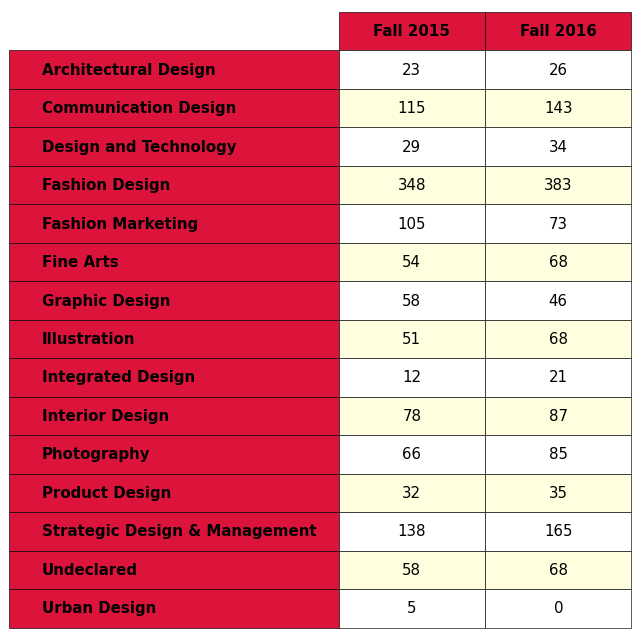

In [38]:
## MAJOR CHART

# setup
fig_major, ax_major = plt.subplots(1, 1,  constrained_layout = True, figsize = (7,7), dpi = 90)
ax_major.set_axis_off()

# create major table
majors = ax_major.table(cellText = df_major2.values,
                        colLabels = df_major2.columns,
                        rowLabels = df_major2.index,
                      
                        # set colors
                        rowColours = ['crimson']*df_major2.index.shape[0],
                        colColours = ['crimson']*df_major2.columns.shape[0],
                        cellColours = [['white', 'white'], ['lightyellow', 'lightyellow'], ['white', 'white'], 
                                       ['lightyellow', 'lightyellow'], ['white', 'white'], ['lightyellow', 'lightyellow'],
                                       ['white', 'white'], ['lightyellow', 'lightyellow'], ['white', 'white'],
                                       ['lightyellow', 'lightyellow'], ['white', 'white'], ['lightyellow', 'lightyellow'],
                                       ['white', 'white'], ['lightyellow', 'lightyellow'], ['white', 'white']],
                                     
                        # cell alignment
                        cellLoc = 'center',
                        loc = 'center')

# change row height
majors.scale(1, 2)

# change font
majors.auto_set_font_size(False)
majors.set_fontsize(12)

for (row, col), cell in majors.get_celld().items():
    # set border weight
    cell.set_linewidth(.50)
    
    # make headers bold
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties = FontProperties(weight = 'bold', size = 12))

# display chart
plt.show()
plt.close()

<a id='pdf'></a>

# D. Exporting to PDF
A PDF is built and the tables and images created are added. The file is saved to the local disk.

In [39]:
## SETUP
# create doc
doc: Document = Document()
# create pages
page1: Page = Page()
page2: Page = Page()
page3: Page = Page()
page4: Page = Page()

## PAGE 1
# add page to doc
doc.add_page(page1)
# set page layout
layout: PageLayout = SingleColumnLayout(page1)

# create decorative red line
horizontal = FlexibleColumnWidthTable(number_of_rows = 1, number_of_columns = 1, horizontal_alignment=Alignment.CENTERED)
horizontal.add(TableCell(
                    Paragraph('', font_size = Decimal(1)),
                    preferred_width = Decimal(466),
                    preferred_height = Decimal(8),
                    background_color = HexColor("#dc143c")
                ))
horizontal.no_borders()

# add header text
layout.add(Paragraph('Fall 2015 and Fall 2016 Cohorts Analysis', font_size = Decimal(14), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Paragraph('Lauren Forti', font_size = Decimal(11), font = 'Helvetica', horizontal_alignment = Alignment.CENTERED))

# add line
layout.add(horizontal)

# add empty paragraphs for spacing
layout.add(Paragraph(''))

# add headcounts table
layout.add(Paragraph('Headcounts by Student Type', font_size = Decimal(11), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Chart(fig_headct,
                 width = Decimal((fig_headct.get_size_inches() * fig_headct.dpi)[0])/2,
                 height = Decimal((fig_headct.get_size_inches() * fig_headct.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED))

# add empty paragraph for spacing
layout.add(Paragraph(''))

# add race/ethnicity dist table
layout.add(Paragraph('Student Race/Ethnicity Distribution by Cohort', font_size = Decimal(11), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Chart(fig_eth, 
                 width = Decimal((fig_eth.get_size_inches() * fig_eth.dpi)[0])/2,
                 height = Decimal((fig_eth.get_size_inches() * fig_eth.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED))

## PAGE 2
# add page to doc
doc.add_page(page2)
# set page layout
layout: PageLayout = SingleColumnLayout(page2)

# add empty paragraphs for spacing
layout.add(Paragraph(''))

# add race/ethnicity Fall 2015 chart
layout.add(Chart(fig_eth_2015, 
                 width = Decimal((fig_eth_2015.get_size_inches() * fig_eth_2015.dpi)[0])/2,
                 height = Decimal((fig_eth_2015.get_size_inches() * fig_eth_2015.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED,
                 vertical_alignment = Alignment.MIDDLE))

# add empty paragraphs for spacing
layout.add(Paragraph(''))
layout.add(Paragraph(''))
layout.add(Paragraph(''))

# add race/ethnicity Fall 2016 chart
layout.add(Chart(fig_eth_2016, 
                 width = Decimal((fig_eth_2016.get_size_inches() * fig_eth_2016.dpi)[0])/2,
                 height = Decimal((fig_eth_2016.get_size_inches() * fig_eth_2016.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED,
                 vertical_alignment = Alignment.MIDDLE))

## PAGE 3
# add page to doc
doc.add_page(page3)
# set page layout
layout: PageLayout = SingleColumnLayout(page3)

# add percentage grads charts
layout.add(Paragraph('Percentage of Full-Time Students Completing Bachelors Degrees', font_size = Decimal(11), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Chart(grads_fig, 
                 width = Decimal((grads_fig.get_size_inches() * grads_fig.dpi)[0])/2,
                 height = Decimal((grads_fig.get_size_inches() * grads_fig.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED))

# add empty paragraphs for spacing
layout.add(Paragraph(''))
layout.add(Paragraph(''))

# add percentage grads 4 years charts
layout.add(Paragraph('Percentage of Full-Time Students Completing Bachelors Degrees Within 4 Years', font_size = Decimal(11), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Chart(grads_baft_fig, 
                 width = Decimal((grads_baft_fig.get_size_inches() * grads_baft_fig.dpi)[0])/2,
                 height = Decimal((grads_baft_fig.get_size_inches() * grads_baft_fig.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED))

## PAGE 4
# add page to doc
doc.add_page(page4)
# set page layout
layout: PageLayout = SingleColumnLayout(page4)

# add major table
layout.add(Paragraph('Student Major Distribution', font_size = Decimal(11), font = 'Helvetica-Bold', horizontal_alignment = Alignment.CENTERED))
layout.add(Chart(fig_major, 
                 width = Decimal((fig_major.get_size_inches() * fig_major.dpi)[0])/2,
                 height = Decimal((fig_major.get_size_inches() * fig_major.dpi)[1])/2,
                 horizontal_alignment = Alignment.CENTERED))

# write to pdf
with open('NewSchool_Fall2015_Fall2016_Cohorts_Analysis.pdf', 'wb') as pdf_file_handle:
    PDF.dumps(pdf_file_handle, doc)